# Our project focuses on enhancing customer service in the banking domain by fine-tuning a MarianMT model for improved translation performance. Specifically, we adapted the model to the banking context by fine-tuning it with a domain-specific dataset that includes both a banking dataset and general MSA (Modern Standard Arabic) data to enhance linguistic accuracy and contextual understanding.



# I will Use banking dataset here a i am making data analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('banking77_train.csv', header=None, names=['text'])


In [ ]:
display(df.head())

,text
0,text
1,I am still waiting on my card?
2,What can I do if my card still hasn't arrived ...
3,I have been waiting over a week. Is the card s...
4,Can I track my card while it is in the process...


# What the data contain
The dataset contains a series of English text entries, each representing a customer inquiry or statement, likely covering a variety of topics within the banking or financial services domain. Each entry is a unique customer question or request, which may pertain to:

Common Banking Services: Queries related to account information, transaction issues, card delivery, payments, and service access.

Customer Support Requests: Inquiries about service delays, troubleshooting, and help with specific banking processes.

Intent and Topic Diversity: The entries likely represent multiple customer intents, making this dataset suitable for tasks like intent classification, sentiment analysis, and natural language understanding in customer service automation.

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10004 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


None

In [ ]:
display(df.isnull().sum())

,0
text,0


# We have 10k Samples in english

In [ ]:
df.count()

,0
text,10004


we 10K samples

In [ ]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.0 MB/s eta 0:00:00


# Since the dataset contain only english i will add extra olumn and translate it to arabic:
Here's the code where I'm translating an English dataset into Arabic using deep_translator. The translation process is split into four parts (2,501 sentences each) to avoid losing progress if an error occurs. After every 500 sentences, the code prints an update, and it saves each part as a separate CSV with UTF-8 encoding to preserve the Arabic characters. If the main translator fails, it falls back on an alternative translator, and in case both fail, it logs "Translation failed" for that entry. This setup ensures minimal data loss and maintains visibility into the progress.


In [ ]:
from deep_translator import GoogleTranslator, MyMemoryTranslator
import pandas as pd
import time

df = pd.read_csv('banking77_train.csv', header=None, names=['text'])
translator = GoogleTranslator(source='en', target='ar')
fallback_translator = MyMemoryTranslator(source='en-US', target='ar-SA')

chunk_size = 2501
translated_sentences = 0
part_number = 1
partial_translations = []

def translate_with_progress(text):
    global translated_sentences
    try:
        translation = translator.translate(text)
    except Exception:
        try:
            translation = fallback_translator.translate(text)
        except:
            translation = "Translation failed"
    translated_sentences += 1
    if translated_sentences % 500 == 0 or translated_sentences == 10004:
        print(f"Translated {translated_sentences}/10004 sentences...")
    time.sleep(0.1)
    return translation

for idx, row in df.iterrows():
    text = row['text']
    translated_text = translate_with_progress(text)
    partial_translations.append((text, translated_text))

    if (translated_sentences % chunk_size == 0) or (translated_sentences == 10004):
        partial_df = pd.DataFrame(partial_translations, columns=['text', 'text_arabic'])
        partial_df.to_csv(f'banking77_train_with_arabic_part{part_number}.csv', index=False, encoding='utf-8')
        print(f"Saved part {part_number}")
        partial_translations = []
        part_number += 1

    if part_number > 4:
        break


Translated 500/10004 sentences...
Translated 1000/10004 sentences...
Translated 1500/10004 sentences...
Translated 2000/10004 sentences...
Translated 2500/10004 sentences...
Saved part 1
Translated 3000/10004 sentences...
Translated 3500/10004 sentences...
Translated 4000/10004 sentences...
Translated 4500/10004 sentences...
Translated 5000/10004 sentences...
Saved part 2
Translated 5500/10004 sentences...
Translated 6000/10004 sentences...
Translated 6500/10004 sentences...
Translated 7000/10004 sentences...
Translated 7500/10004 sentences...
Saved part 3
Translated 8000/10004 sentences...
Translated 8500/10004 sentences...
Translated 9000/10004 sentences...
Translated 9500/10004 sentences...
Translated 10000/10004 sentences...
Translated 10004/10004 sentences...
Saved part 4


Here i am saving the whole data into one file

In [ ]:
import pandas as pd

# Load the four parts and concatenate them into a single DataFrame
part1 = pd.read_csv('banking77_train_with_arabic_part1.csv', encoding='utf-8')
part2 = pd.read_csv('banking77_train_with_arabic_part2.csv', encoding='utf-8')
part3 = pd.read_csv('banking77_train_with_arabic_part3.csv', encoding='utf-8')
part4 = pd.read_csv('banking77_train_with_arabic_part4.csv', encoding='utf-8')

combined_df = pd.concat([part1, part2, part3, part4], ignore_index=True)

# Display the combined DataFrame
display(combined_df.head())

# Optionally, save the combined DataFrame to a single CSV file
#combined_df.to_csv('banking77_train_with_arabic_combined.csv', index=False, encoding='utf-8')


,text,text_arabic
0,text,نص
1,I am still waiting on my card?,مازلت أنتظر بطاقتي؟
2,What can I do if my card still hasn't arrived ...,ماذا يمكنني أن أفعل إذا لم تصل بطاقتي بعد مرور...
3,I have been waiting over a week. Is the card s...,لقد انتظرت أكثر من أسبوع، هل ستصلني البطاقة؟
4,Can I track my card while it is in the process...,هل يمكنني تتبع بطاقتي أثناء عملية التسليم؟


In [ ]:
import pandas as pd

# Load the four parts and concatenate them into a single DataFrame
part1 = pd.read_csv('banking77_train_with_arabic_part1.csv', encoding='utf-8')
part2 = pd.read_csv('banking77_train_with_arabic_part2.csv', encoding='utf-8')
part3 = pd.read_csv('banking77_train_with_arabic_part3.csv', encoding='utf-8')
part4 = pd.read_csv('banking77_train_with_arabic_part4.csv', encoding='utf-8')

combined_df = pd.concat([part1, part2, part3, part4], ignore_index=True)

# Save the combined DataFrame to an Excel file without the encoding parameter
# combined_df.to_excel('banking77_train_with_arabic_combined.xlsx', index=False)


We have 10 parallel samples from arabic and other 10K from english

In [ ]:
combined_df.count()

,0
text,10004
text_arabic,10004


In [ ]:
combined_df.rename(columns={'text': 'english', 'text_arabic': 'arabic'}, inplace=True)


In [ ]:
combined_df

,english,arabic
0,text,نص
1,I am still waiting on my card?,مازلت أنتظر بطاقتي؟
2,What can I do if my card still hasn't arrived ...,ماذا يمكنني أن أفعل إذا لم تصل بطاقتي بعد مرور...
3,I have been waiting over a week. Is the card s...,لقد انتظرت أكثر من أسبوع، هل ستصلني البطاقة؟
4,Can I track my card while it is in the process...,هل يمكنني تتبع بطاقتي أثناء عملية التسليم؟
...,...,...
9999,You provide support in what countries?,في أي البلدان تقدمون الدعم؟
10000,What countries are you supporting?,ما هي الدول التي تدعمها؟
10001,What countries are getting support?,ما هي الدول التي تحصل على الدعم؟
10002,Are cards available in the EU?,هل البطاقات متاحة في الاتحاد الأوروبي؟


Now i will a human evaluation to check the quality of the data that have been translated and then i will use them to find tune a model

But first will load the new dataset which contain the snetneces and. its corresponding output

In [ ]:
# Let's load the dataset as an Excel file and display the first few lines to review the content and structure.
file_path = 'bankingData_En-Ar.xlsx'
banking_data = pd.read_excel(file_path)

# Display the first few rows of the dataset
banking_data.head()


,text,text_arabic
0,text,نص
1,I am still waiting on my card?,مازلت أنتظر بطاقتي؟
2,What can I do if my card still hasn't arrived ...,ماذا يمكنني أن أفعل إذا لم تصل بطاقتي بعد مرور...
3,I have been waiting over a week. Is the card s...,لقد انتظرت أكثر من أسبوع، هل ستصلني البطاقة؟
4,Can I track my card while it is in the process...,هل يمكنني تتبع بطاقتي أثناء عملية التسليم؟


In [ ]:
banking_data.rename(columns={'text': 'english', 'text_arabic': 'arabic'}, inplace=True)


In [ ]:
banking_data.head()

,english,arabic
0,text,نص
1,I am still waiting on my card?,مازلت أنتظر بطاقتي؟
2,What can I do if my card still hasn't arrived ...,ماذا يمكنني أن أفعل إذا لم تصل بطاقتي بعد مرور...
3,I have been waiting over a week. Is the card s...,لقد انتظرت أكثر من أسبوع، هل ستصلني البطاقة؟
4,Can I track my card while it is in the process...,هل يمكنني تتبع بطاقتي أثناء عملية التسليم؟


In [ ]:

# Drop the first row (index 0) from the DataFrame
banking_data = banking_data.drop(index=0)

# Display the modified DataFrame to verify the first row is removed
banking_data.head()


,english,arabic
1,I am still waiting on my card?,مازلت أنتظر بطاقتي؟
2,What can I do if my card still hasn't arrived ...,ماذا يمكنني أن أفعل إذا لم تصل بطاقتي بعد مرور...
3,I have been waiting over a week. Is the card s...,لقد انتظرت أكثر من أسبوع، هل ستصلني البطاقة؟
4,Can I track my card while it is in the process...,هل يمكنني تتبع بطاقتي أثناء عملية التسليم؟
5,"How do I know if I will get my card, or if it ...",كيف أعرف إذا كنت سأحصل على بطاقتي أم ضاعت؟


# To evaluate the model i will evaluate it it based on the Bleu score , bleu score and Human evaluation

In [ ]:
pip install transformers


# Now i will create new column for the banking dataset which i will divide the dataset to 80% training set and 10% test set and 10% validation set and i will save them to these categories to ensure no data leakage and do the experiments on the the same data

In [ ]:
import pandas as pd

file_path = 'bankingData_En-Ar.xlsx'

banking_data = pd.read_excel(file_path)

display(banking_data.head())


,English,Arabic
0,I am still waiting on my card?,مازلت أنتظر بطاقتي؟
1,What can I do if my card still hasn't arrived ...,ماذا يمكنني أن أفعل إذا لم تصل بطاقتي بعد مرور...
2,I have been waiting over a week. Is the card s...,لقد انتظرت أكثر من أسبوع، هل ستصلني البطاقة؟
3,Can I track my card while it is in the process...,هل يمكنني تتبع بطاقتي أثناء عملية التسليم؟
4,"How do I know if I will get my card, or if it ...",كيف أعرف إذا كنت سأحصل على بطاقتي أم ضاعت؟


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'bankingData_En-Ar.xlsx'
banking_data = pd.read_excel(file_path)

# Display the first few rows
display(banking_data.head())

# Shuffle the dataset
banking_data = banking_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into 80% training, 10% validation, and 10% test sets
train_data, temp_data = train_test_split(banking_data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Label each split in a new column
train_data['split'] = 'train'
val_data['split'] = 'validation'
test_data['split'] = 'test'

# Combine all splits into a single DataFrame with labels
final_data = pd.concat([train_data, val_data, test_data]).reset_index(drop=True)

# Check for data leakage by ensuring no overlap between splits
train_texts = set(train_data['English'])
val_texts = set(val_data['English'])
test_texts = set(test_data['English'])

# Find any overlaps
train_val_overlap = train_texts.intersection(val_texts)
train_test_overlap = train_texts.intersection(test_texts)
val_test_overlap = val_texts.intersection(test_texts)

# Display overlap results
print(f"Train-Validation Overlap: {len(train_val_overlap)} entries")
print(f"Train-Test Overlap: {len(train_test_overlap)} entries")
print(f"Validation-Test Overlap: {len(val_test_overlap)} entries")

# Save the dataset with splits if no overlap is detected
if not train_val_overlap and not train_test_overlap and not val_test_overlap:
    final_data.to_excel("bankingData_En-Ar_with_splits.xlsx", index=False)
    print("No data leakage detected. Dataset saved as 'bankingData_En-Ar_with_splits.xlsx'")
else:
    print("Data leakage detected. Review overlaps in the splits.")


,English,Arabic
0,I am still waiting on my card?,مازلت أنتظر بطاقتي؟
1,What can I do if my card still hasn't arrived ...,ماذا يمكنني أن أفعل إذا لم تصل بطاقتي بعد مرور...
2,I have been waiting over a week. Is the card s...,لقد انتظرت أكثر من أسبوع، هل ستصلني البطاقة؟
3,Can I track my card while it is in the process...,هل يمكنني تتبع بطاقتي أثناء عملية التسليم؟
4,"How do I know if I will get my card, or if it ...",كيف أعرف إذا كنت سأحصل على بطاقتي أم ضاعت؟


Train-Validation Overlap: 0 entries
Train-Test Overlap: 0 entries
Validation-Test Overlap: 0 entries
No data leakage detected. Dataset saved as 'bankingData_En-Ar_with_splits.xlsx'


<ipython-input-3-9052f32977f2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=split_counts.index, y=split_counts.values, palette='viridis')


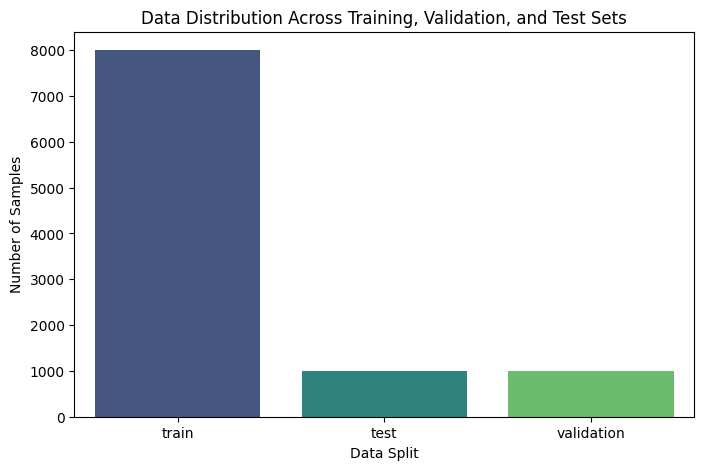

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with splits
file_path = 'bankingData_En-Ar_with_splits.xlsx'
final_data = pd.read_excel(file_path)

# Count the number of samples in each split
split_counts = final_data['split'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=split_counts.index, y=split_counts.values, palette='viridis')
plt.title('Data Distribution Across Training, Validation, and Test Sets')
plt.xlabel('Data Split')
plt.ylabel('Number of Samples')
plt.show()

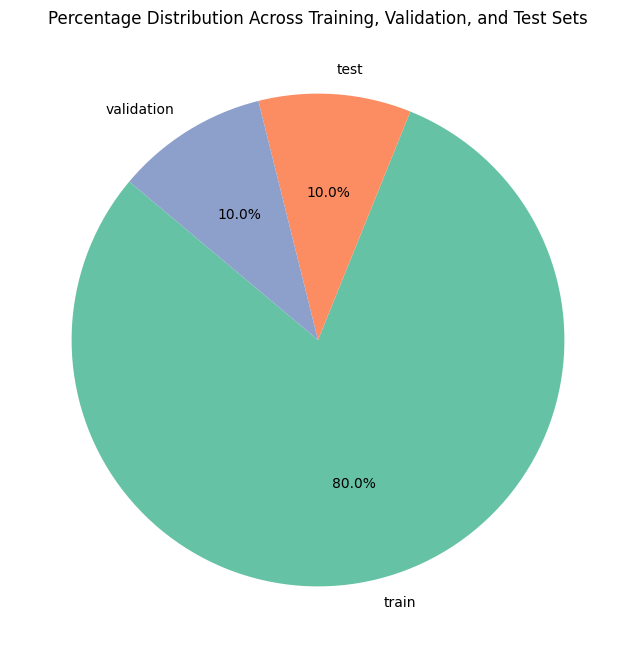

In [ ]:
split_counts = final_data['split'].value_counts(normalize=True) * 100

# Plotting as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(split_counts, labels=split_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Percentage Distribution Across Training, Validation, and Test Sets')
plt.show()

# Results of the Bleu score on the test set on the model MarianMT before fine tuning it  :

In [ ]:
pip install datasets

In [ ]:
!pip install evaluate sacrebleu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
import torch
import evaluate

file_path = 'bankingData_En-Ar_with_splits.xlsx'
data = pd.read_excel(file_path)

test_data = data[data['split'] == 'test']

model_name = 'Helsinki-NLP/opus-mt-en-ar'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name).to('cuda')


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:

def translate_texts(texts):
    translations = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to('cuda')
        translated_tokens = model.generate(**inputs)
        translation = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
        translations.append(translation)
    return translations

test_translations = translate_texts(test_data['English'].tolist())

bleu_metric = evaluate.load("sacrebleu")
test_bleu = bleu_metric.compute(predictions=test_translations, references=[[ref] for ref in test_data['Arabic'].tolist()])

print(f"Test BLEU Score: {test_bleu['score']:.2f}")


Test BLEU Score: 25.48


Note the Bleu score at each epoch is on validation set while the Bleu score on the test set will be displayed at the end

next step is to make the model output the translation tcs to make comparision and then i will fine tune it again uning the 25k samples.

In [ ]:
!pip install transformers datasets pandas sacrebleu

In [ ]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
from datasets import Dataset
import torch
import evaluate
import re

file_path = 'bankingData_En-Ar_with_splits.xlsx'
data = pd.read_excel(file_path)

train_data = data[data['split'] == 'train']
val_data = data[data['split'] == 'validation']
test_data = data[data['split'] == 'test']

def preprocess_text(text, language="en"):
    text = text.lower()
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    if language == "ar":
        text = re.sub(r'[^\u0621-\u064A\s]', '', text)
    return text


In [ ]:
train_data['English'] = train_data['English'].apply(lambda x: preprocess_text(x, "en"))
train_data['Arabic'] = train_data['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
val_data['English'] = val_data['English'].apply(lambda x: preprocess_text(x, "en"))
val_data['Arabic'] = val_data['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
test_data['English'] = test_data['English'].apply(lambda x: preprocess_text(x, "en"))
test_data['Arabic'] = test_data['Arabic'].apply(lambda x: preprocess_text(x, "ar"))

train_dataset = Dataset.from_pandas(train_data[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))
val_dataset = Dataset.from_pandas(val_data[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))
test_dataset = Dataset.from_pandas(test_data[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))

model_name = 'Helsinki-NLP/opus-mt-en-ar'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name).to("cuda")

def preprocess_data(examples):
    inputs = tokenizer(examples['source_text'], padding="max_length", truncation=True, max_length=128)
    targets = tokenizer(examples['target_text'], padding="max_length", truncation=True, max_length=128)
    inputs['labels'] = targets['input_ids']
    return inputs


<ipython-input-7-defafd68524c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['English'] = train_data['English'].apply(lambda x: preprocess_text(x, "en"))
<ipython-input-7-defafd68524c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Arabic'] = train_data['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
<ipython-input-7-defafd68524c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
train_dataset = train_dataset.map(preprocess_data, batched=True)
val_dataset = val_dataset.map(preprocess_data, batched=True)
test_dataset = test_dataset.map(preprocess_data, batched=True)

training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=7,
    predict_with_generate=True,
    fp16=True,
    load_best_model_at_end=True,
)

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

bleu_metric = evaluate.load("sacrebleu")

def compute_metrics(eval_preds):
    predictions, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    bleu = bleu_metric.compute(predictions=decoded_preds, references=[[label] for label in decoded_labels])
    return {"bleu": bleu["score"]}

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()


Map:   0%|          | 0/8002 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1001 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Epoch,Training Loss,Validation Loss,Bleu
1,0.167100,0.111287,44.239899
2,0.107000,0.089857,50.970087
3,0.082600,0.079220,54.290577
4,0.069000,0.075435,56.285528
5,0.058100,0.072889,57.408323
6,0.052000,0.071664,57.757713
7,0.046500,0.071392,57.862819


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[62801]], 'forced_eos_token_id': 0}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[62801]], 'forced_eos_token_id': 0}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strate

TrainOutput(global_step=7007, training_loss=0.1094178523625357, metrics={'train_runtime': 2486.4169, 'train_samples_per_second': 22.528, 'train_steps_per_second': 2.818, 'total_flos': 1898783013076992.0, 'train_loss': 0.1094178523625357, 'epoch': 7.0})

In [ ]:
output_dir = "fine_tuned_marian_mt_banking_en_ar_2"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

def translate_texts_batched(texts, batch_size=16):
    translations = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True).to('cuda')
        translated_tokens = model.generate(**inputs)
        batch_translations = [tokenizer.decode(t, skip_special_tokens=True) for t in translated_tokens]
        translations.extend(batch_translations)
    return translations

test_translations = translate_texts_batched(test_data['English'].tolist(), batch_size=16)

test_bleu = bleu_metric.compute(predictions=test_translations, references=[[ref] for ref in test_data['Arabic'].tolist()])
print(f"Final Test BLEU Score: {test_bleu['score']:.2f}")


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[62801]], 'forced_eos_token_id': 0}


Final Test BLEU Score: 56.14


In [ ]:
import shutil

# Specify the model directory and the output zip file name
model_dir = "fine_tuned_marian_mt_banking_en_ar_2"
zip_file = model_dir + ".zip"

# Zip the directory
shutil.make_archive(model_dir, 'zip', model_dir)

print(f"Model zipped to {zip_file}")


Model zipped to fine_tuned_marian_mt_banking_en_ar_2.zip


# since i have other dataset i will train hte model on both the genral dataset which contain 25k samples with addition to the 10k samples of the banking dataset

In [ ]:
import pandas as pd
import random

# Load the dataset
file_path = 'ara_eng.txt'  # Assuming this is the correct location for your file
data = pd.read_csv(file_path, sep="\t", header=None, names=["English", "Arabic"])

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate split indices for 80% train, 10% validation, 10% test
train_end = int(0.8 * len(data))
val_end = train_end + int(0.1 * len(data))

# Assign split type
data['split'] = 'train'
data.loc[train_end:val_end, 'split'] = 'val'
data.loc[val_end:, 'split'] = 'test'

# Save to Excel with the desired column order
output_file = 'ara_eng_split2.xlsx'
data = data[["English", "Arabic", "split"]]  # Reorder the columns
data.to_excel(output_file, index=False)

output_file


'ara_eng_split2.xlsx'

In [ ]:
# Load the two datasets
banking_file_path = 'bankingData_En-Ar_with_splits.xlsx'
ara_file_path = 'ara_eng_with_splits.xlsx'

# Read both Excel files into DataFrames
banking_data = pd.read_excel(banking_file_path)
ara_data = pd.read_excel(ara_file_path)

# Combine the two DataFrames
combined_data = pd.concat([banking_data, ara_data], ignore_index=True)

# Save the combined dataset to a new Excel file
combined_output_file = 'combined_english_arabic_with_splits.xlsx'
combined_data.to_excel(combined_output_file, index=False)

combined_output_file


'combined_english_arabic_with_splits.xlsx'

## Now after combining the dataset of genreal topics and banking topics i will fine tune the model to see the performance on the new dataset 34k+

In [ ]:
!pip install transformers datasets pandas sacrebleu evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from transformers import (
    MarianMTModel, MarianTokenizer, Seq2SeqTrainer,
    Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
)
from datasets import Dataset
import torch
import evaluate
import re

# Load training and validation dataset
train_val_file_path = 'combined_english_arabic_with_splits.xlsx'
train_val_data = pd.read_excel(train_val_file_path)

# Load test dataset
test_file_path = 'bankingData_En-Ar_with_splits.xlsx'
test_data_combined = pd.read_excel(train_val_file_path)
test_data_banking = pd.read_excel(test_file_path)

# Split train_val_data into train and validation sets
train_data = train_val_data[train_val_data['split'] == 'train']
val_data = train_val_data[train_val_data['split'] == 'validation']

# Split test data into separate DataFrames for the test splits only
test_data_combined = test_data_combined[test_data_combined['split'] == 'test']
test_data_banking = test_data_banking[test_data_banking['split'] == 'test']

# Preprocessing function to clean text
def preprocess_text(text, language="en"):
    text = text.lower()
    text = re.sub(r'[0-9]+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    if language == "ar":
        text = re.sub(r'[^\u0621-\u064A\s]', '', text)  # Keep only Arabic characters
    return text

# Apply preprocessing to train, val, and test datasets
train_data['English'] = train_data['English'].apply(lambda x: preprocess_text(x, "en"))
train_data['Arabic'] = train_data['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
val_data['English'] = val_data['English'].apply(lambda x: preprocess_text(x, "en"))
val_data['Arabic'] = val_data['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
test_data_combined['English'] = test_data_combined['English'].apply(lambda x: preprocess_text(x, "en"))
test_data_combined['Arabic'] = test_data_combined['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
test_data_banking['English'] = test_data_banking['English'].apply(lambda x: preprocess_text(x, "en"))
test_data_banking['Arabic'] = test_data_banking['Arabic'].apply(lambda x: preprocess_text(x, "ar"))

# Convert DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_data[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))
val_dataset = Dataset.from_pandas(val_data[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))
test_dataset_combined = Dataset.from_pandas(test_data_combined[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))
test_dataset_banking = Dataset.from_pandas(test_data_banking[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))

# Load the MarianMT model and tokenizer
model_name = 'Helsinki-NLP/opus-mt-en-ar'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name).to("cuda")

# Preprocess data for tokenization
def preprocess_data(examples):
    inputs = tokenizer(examples['source_text'], padding="max_length", truncation=True, max_length=128)
    targets = tokenizer(examples['target_text'], padding="max_length", truncation=True, max_length=128)
    inputs['labels'] = targets['input_ids']
    return inputs

train_dataset = train_dataset.map(preprocess_data, batched=True)
val_dataset = val_dataset.map(preprocess_data, batched=True)
test_dataset_combined = test_dataset_combined.map(preprocess_data, batched=True)
test_dataset_banking = test_dataset_banking.map(preprocess_data, batched=True)

# Set up training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=4,
    learning_rate=3e-5,
    warmup_steps=1000,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=10,
    predict_with_generate=True,
    generation_max_length=300,
    generation_num_beams=8,
    fp16=True,
    load_best_model_at_end=True,
)

# Data collator to format the inputs
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# Load BLEU metric for evaluation
bleu_metric = evaluate.load("sacrebleu")

# Function to compute BLEU score
def compute_metrics(eval_preds):
    predictions, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    bleu = bleu_metric.compute(predictions=decoded_preds, references=[[label] for label in decoded_labels])
    return {"bleu": bleu["score"]}

# Initialize the trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

# Save the fine-tuned model
output_dir = "fine_tuned_marian_mt_banking_en_ar1"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Function to translate text in batches
def translate_texts_batched(texts, batch_size=16):
    translations = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True).to('cuda')
        translated_tokens = model.generate(**inputs)
        batch_translations = [tokenizer.decode(t, skip_special_tokens=True) for t in translated_tokens]
        translations.extend(batch_translations)
    return translations

# Translate and calculate BLEU score for the test split of both datasets
print("Evaluating on Combined Dataset Test Split:")
test_translations_combined = translate_texts_batched(test_data_combined['English'].tolist(), batch_size=16)
test_bleu_combined = bleu_metric.compute(predictions=test_translations_combined, references=[[ref] for ref in test_data_combined['Arabic'].tolist()])
print(f"Combined Test BLEU Score: {test_bleu_combined['score']:.2f}")

print("\nEvaluating on Banking Dataset Test Split:")
test_translations_banking = translate_texts_batched(test_data_banking['English'].tolist(), batch_size=16)
test_bleu_banking = bleu_metric.compute(predictions=test_translations_banking, references=[[ref] for ref in test_data_banking['Arabic'].tolist()])
print(f"Banking Test BLEU Score: {test_bleu_banking['score']:.2f}")


C:\Users\Besher\AppData\Local\Temp\ipykernel_12400\1013224662.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['English'] = train_data['English'].apply(lambda x: preprocess_text(x, "en"))
C:\Users\Besher\AppData\Local\Temp\ipykernel_12400\1013224662.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Arabic'] = train_data['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
C:\Users\Besher\AppData\Local\Temp\ipykernel_12400\1013224662.py:41: SettingWithCopyWarning: 
A value is try

Map:   0%|          | 0/27712 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3466 [00:00<?, ? examples/s]

Map:   0%|          | 0/1001 [00:00<?, ? examples/s]

C:\Users\Besher\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\Besher\AppData\Local\Temp\ipykernel_12400\1013224662.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Epoch,Training Loss,Validation Loss,Bleu
1,1.927600,0.154405,33.071788
2,0.392700,0.099074,44.830202
3,0.317900,0.082817,50.993883
4,0.291500,0.076012,53.198766
5,0.263000,0.070914,54.725758
6,0.246000,0.068588,55.818193
7,0.230600,0.066691,56.337417
8,0.223600,0.065944,57.305417
9,0.219600,0.065129,57.104379
10,0.212100,0.065076,57.010204


Streaming output truncated to the last 5000 lines.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Tra

Evaluating on Combined Dataset Test Split:
Combined Test BLEU Score: 20.25

Evaluating on Banking Dataset Test Split:
Banking Test BLEU Score: 55.95


# Here i am experimenting and trying different variation of values of the hyperparametes to see how the performance of the translated text will be

# 1. High Quality (Longer Training, Best Accuracy)
Goal: Maximize translation quality, slow convergence but high accuracy.
Best for: Small or medium datasets, when accuracy is prioritized over speed.

In [ ]:
import pandas as pd
from transformers import (
    MarianMTModel, MarianTokenizer, Seq2SeqTrainer,
    Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
)
from datasets import Dataset
import torch
import evaluate
import re

# Load training and validation dataset
train_val_file_path = 'combined_english_arabic_with_splits.xlsx'
train_val_data = pd.read_excel(train_val_file_path)

# Load test dataset
test_file_path = 'bankingData_En-Ar_with_splits.xlsx'
test_data_combined = pd.read_excel(train_val_file_path)
test_data_banking = pd.read_excel(test_file_path)

# Split train_val_data into train and validation sets
train_data = train_val_data[train_val_data['split'] == 'train']
val_data = train_val_data[train_val_data['split'] == 'validation']

# Split test data into separate DataFrames for the test splits only
test_data_combined = test_data_combined[test_data_combined['split'] == 'test']
test_data_banking = test_data_banking[test_data_banking['split'] == 'test']

# Preprocessing function to clean text
def preprocess_text(text, language="en"):
    text = text.lower()
    text = re.sub(r'[0-9]+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    if language == "ar":
        text = re.sub(r'[^\u0621-\u064A\s]', '', text)  # Keep only Arabic characters
    return text

# Apply preprocessing to train, val, and test datasets
train_data['English'] = train_data['English'].apply(lambda x: preprocess_text(x, "en"))
train_data['Arabic'] = train_data['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
val_data['English'] = val_data['English'].apply(lambda x: preprocess_text(x, "en"))
val_data['Arabic'] = val_data['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
test_data_combined['English'] = test_data_combined['English'].apply(lambda x: preprocess_text(x, "en"))
test_data_combined['Arabic'] = test_data_combined['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
test_data_banking['English'] = test_data_banking['English'].apply(lambda x: preprocess_text(x, "en"))
test_data_banking['Arabic'] = test_data_banking['Arabic'].apply(lambda x: preprocess_text(x, "ar"))

# Convert DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_data[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))
val_dataset = Dataset.from_pandas(val_data[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))
test_dataset_combined = Dataset.from_pandas(test_data_combined[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))
test_dataset_banking = Dataset.from_pandas(test_data_banking[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))

# Load the MarianMT model and tokenizer
model_name = 'Helsinki-NLP/opus-mt-en-ar'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name).to("cuda")

# Preprocess data for tokenization
def preprocess_data(examples):
    inputs = tokenizer(examples['source_text'], padding="max_length", truncation=True, max_length=128)
    targets = tokenizer(examples['target_text'], padding="max_length", truncation=True, max_length=128)
    inputs['labels'] = targets['input_ids']
    return inputs

train_dataset = train_dataset.map(preprocess_data, batched=True)
val_dataset = val_dataset.map(preprocess_data, batched=True)
test_dataset_combined = test_dataset_combined.map(preprocess_data, batched=True)
test_dataset_banking = test_dataset_banking.map(preprocess_data, batched=True)

# Set up training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=6,       # VRAM-friendly for longer sessions
    per_device_eval_batch_size=6,
    gradient_accumulation_steps=8,       # Effective batch size = 6 * 8 = 48
    learning_rate=1e-5,                  # Lower learning rate for stable, gradual learning
    warmup_steps=500,                    # Slightly shorter warmup for faster stability
    weight_decay=0.01,
    num_train_epochs=12,                 # More epochs to improve quality
    predict_with_generate=True,
    generation_max_length=300,           # Increased for longer translations
    generation_num_beams=8,              # Higher beam count for better generation quality
    fp16=True,                           # Mixed precision for efficient GPU use
    load_best_model_at_end=True,
)


# Data collator to format the inputs
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# Load BLEU metric for evaluation
bleu_metric = evaluate.load("sacrebleu")

# Function to compute BLEU score
def compute_metrics(eval_preds):
    predictions, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    bleu = bleu_metric.compute(predictions=decoded_preds, references=[[label] for label in decoded_labels])
    return {"bleu": bleu["score"]}

# Initialize the trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

# Save the fine-tuned model
output_dir = "fine_tuned_marian_mt_banking_en_ar2"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Function to translate text in batches
def translate_texts_batched(texts, batch_size=16):
    translations = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True).to('cuda')
        translated_tokens = model.generate(**inputs)
        batch_translations = [tokenizer.decode(t, skip_special_tokens=True) for t in translated_tokens]
        translations.extend(batch_translations)
    return translations

# Translate and calculate BLEU score for the test split of both datasets
print("Evaluating on Combined Dataset Test Split:")
test_translations_combined = translate_texts_batched(test_data_combined['English'].tolist(), batch_size=16)
test_bleu_combined = bleu_metric.compute(predictions=test_translations_combined, references=[[ref] for ref in test_data_combined['Arabic'].tolist()])
print(f"Combined Test BLEU Score: {test_bleu_combined['score']:.2f}")

print("\nEvaluating on Banking Dataset Test Split:")
test_translations_banking = translate_texts_batched(test_data_banking['English'].tolist(), batch_size=16)
test_bleu_banking = bleu_metric.compute(predictions=test_translations_banking, references=[[ref] for ref in test_data_banking['Arabic'].tolist()])
print(f"Banking Test BLEU Score: {test_bleu_banking['score']:.2f}")


C:\Users\Besher\AppData\Local\Temp\ipykernel_12400\889989533.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['English'] = train_data['English'].apply(lambda x: preprocess_text(x, "en"))
C:\Users\Besher\AppData\Local\Temp\ipykernel_12400\889989533.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Arabic'] = train_data['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
C:\Users\Besher\AppData\Local\Temp\ipykernel_12400\889989533.py:41: SettingWithCopyWarning: 
A value is trying

Map:   0%|          | 0/27712 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3466 [00:00<?, ? examples/s]

Map:   0%|          | 0/1001 [00:00<?, ? examples/s]

C:\Users\Besher\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\Besher\AppData\Local\Temp\ipykernel_12400\889989533.py:106: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Epoch,Training Loss,Validation Loss,Bleu
0,2.145100,0.234915,22.352614
1,0.503500,0.153079,34.172281
2,0.435900,0.127183,39.337281
3,0.395200,0.113458,42.849247
4,0.376200,0.105147,45.061276
5,0.357700,0.099463,46.486306
6,0.334300,0.095487,47.626047
8,0.322100,0.090876,49.160380
9,0.313500,0.089583,49.369038
10,0.311100,0.088886,49.799684


Streaming output truncated to the last 5000 lines.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Tra

Evaluating on Combined Dataset Test Split:
Combined Test BLEU Score: 17.06

Evaluating on Banking Dataset Test Split:
Banking Test BLEU Score: 49.10


# 2. Balanced Speed and Quality (Moderate)
Goal: Balance between training time and translation quality, maximizing both speed and effectiveness.
Best for: Medium to large datasets, general-purpose training.
python
Copy code


In [ ]:
import pandas as pd
from transformers import (
    MarianMTModel, MarianTokenizer, Seq2SeqTrainer,
    Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
)
from datasets import Dataset
import torch
import evaluate
import re

# Load training and validation dataset
train_val_file_path = 'combined_english_arabic_with_splits.xlsx'
train_val_data = pd.read_excel(train_val_file_path)

# Load test dataset
test_file_path = 'bankingData_En-Ar_with_splits.xlsx'
test_data_combined = pd.read_excel(train_val_file_path)
test_data_banking = pd.read_excel(test_file_path)

# Split train_val_data into train and validation sets
train_data = train_val_data[train_val_data['split'] == 'train']
val_data = train_val_data[train_val_data['split'] == 'validation']

# Split test data into separate DataFrames for the test splits only
test_data_combined = test_data_combined[test_data_combined['split'] == 'test']
test_data_banking = test_data_banking[test_data_banking['split'] == 'test']

# Preprocessing function to clean text
def preprocess_text(text, language="en"):
    text = text.lower()
    text = re.sub(r'[0-9]+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    if language == "ar":
        text = re.sub(r'[^\u0621-\u064A\s]', '', text)  # Keep only Arabic characters
    return text

# Apply preprocessing to train, val, and test datasets
train_data['English'] = train_data['English'].apply(lambda x: preprocess_text(x, "en"))
train_data['Arabic'] = train_data['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
val_data['English'] = val_data['English'].apply(lambda x: preprocess_text(x, "en"))
val_data['Arabic'] = val_data['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
test_data_combined['English'] = test_data_combined['English'].apply(lambda x: preprocess_text(x, "en"))
test_data_combined['Arabic'] = test_data_combined['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
test_data_banking['English'] = test_data_banking['English'].apply(lambda x: preprocess_text(x, "en"))
test_data_banking['Arabic'] = test_data_banking['Arabic'].apply(lambda x: preprocess_text(x, "ar"))

# Convert DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_data[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))
val_dataset = Dataset.from_pandas(val_data[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))
test_dataset_combined = Dataset.from_pandas(test_data_combined[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))
test_dataset_banking = Dataset.from_pandas(test_data_banking[['English', 'Arabic']].rename(columns={'English': 'source_text', 'Arabic': 'target_text'}))

# Load the MarianMT model and tokenizer
model_name = 'Helsinki-NLP/opus-mt-en-ar'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name).to("cuda")

# Preprocess data for tokenization
def preprocess_data(examples):
    inputs = tokenizer(examples['source_text'], padding="max_length", truncation=True, max_length=128)
    targets = tokenizer(examples['target_text'], padding="max_length", truncation=True, max_length=128)
    inputs['labels'] = targets['input_ids']
    return inputs

train_dataset = train_dataset.map(preprocess_data, batched=True)
val_dataset = val_dataset.map(preprocess_data, batched=True)
test_dataset_combined = test_dataset_combined.map(preprocess_data, batched=True)
test_dataset_banking = test_dataset_banking.map(preprocess_data, batched=True)

# Set up training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,       # Balanced for moderate VRAM usage
    per_device_eval_batch_size=8,
    gradient_accumulation_steps=6,       # Effective batch size = 8 * 6 = 48
    learning_rate=2e-5,                  # Moderate learning rate
    warmup_steps=750,                    # Moderate warmup
    weight_decay=0.01,
    num_train_epochs=10,                 # Reasonable epochs for stability
    predict_with_generate=True,
    generation_max_length=256,           # Balanced for memory
    generation_num_beams=6,              # Moderate beams for balance of memory and quality
    fp16=True,
    load_best_model_at_end=True,
)



# Data collator to format the inputs
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# Load BLEU metric for evaluation
bleu_metric = evaluate.load("sacrebleu")

# Function to compute BLEU score
def compute_metrics(eval_preds):
    predictions, labels = eval_preds
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    bleu = bleu_metric.compute(predictions=decoded_preds, references=[[label] for label in decoded_labels])
    return {"bleu": bleu["score"]}

# Initialize the trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Fine-tune the model
trainer.train()

# Save the fine-tuned model
output_dir = "fine_tuned_marian_mt_banking_en_ar3"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Function to translate text in batches
def translate_texts_batched(texts, batch_size=16):
    translations = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True).to('cuda')
        translated_tokens = model.generate(**inputs)
        batch_translations = [tokenizer.decode(t, skip_special_tokens=True) for t in translated_tokens]
        translations.extend(batch_translations)
    return translations

# Translate and calculate BLEU score for the test split of both datasets
print("Evaluating on Combined Dataset Test Split:")
test_translations_combined = translate_texts_batched(test_data_combined['English'].tolist(), batch_size=16)
test_bleu_combined = bleu_metric.compute(predictions=test_translations_combined, references=[[ref] for ref in test_data_combined['Arabic'].tolist()])
print(f"Combined Test BLEU Score: {test_bleu_combined['score']:.2f}")

print("\nEvaluating on Banking Dataset Test Split:")
test_translations_banking = translate_texts_batched(test_data_banking['English'].tolist(), batch_size=16)
test_bleu_banking = bleu_metric.compute(predictions=test_translations_banking, references=[[ref] for ref in test_data_banking['Arabic'].tolist()])
print(f"Banking Test BLEU Score: {test_bleu_banking['score']:.2f}")


C:\Users\Besher\AppData\Local\Temp\ipykernel_13852\306699867.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['English'] = train_data['English'].apply(lambda x: preprocess_text(x, "en"))
C:\Users\Besher\AppData\Local\Temp\ipykernel_13852\306699867.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Arabic'] = train_data['Arabic'].apply(lambda x: preprocess_text(x, "ar"))
C:\Users\Besher\AppData\Local\Temp\ipykernel_13852\306699867.py:41: SettingWithCopyWarning: 
A value is trying

Map:   0%|          | 0/27712 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3466 [00:00<?, ? examples/s]

Map:   0%|          | 0/1001 [00:00<?, ? examples/s]

C:\Users\Besher\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Bleu
0,1.952200,0.205840,25.883487
1,0.467400,0.123467,40.054992
3,0.344600,0.090605,49.131255
4,0.323900,0.084693,50.962128
6,0.281800,0.077554,52.791857
7,0.273900,0.076369,53.776804
9,0.263700,0.075136,54.132713


Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Tr

Evaluating on Combined Dataset Test Split:
Combined Test BLEU Score: 18.64

Evaluating on Banking Dataset Test Split:
Banking Test BLEU Score: 52.63


# Bert Score on the fine tuned models
BERTScore is a metric that evaluates translation quality by measuring semantic similarity between the generated and reference text. Unlike BLEU, which relies on exact word matches, BERTScore uses contextual embeddings to capture meaning, making it robust to synonyms and paraphrasing. This is especially useful in translation tasks for languages like Arabic, where traditional metrics may miss nuanced meanings. BERTScore calculates Precision, Recall, and F1 scores, providing a more accurate assessment of how well translations preserve the intended meaning.

In [ ]:
pip install bert-score

Note: you may need to restart the kernel to use updated packages.


C:\Users\Besher\AppData\Roaming\Python\Python312\site-packages\transformers\generation\configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


calculating scores...
computing bert embedding.


  0%|          | 0/31 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/16 [00:00<?, ?it/s]

done in 2.40 seconds, 416.77 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/31 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/16 [00:00<?, ?it/s]

done in 2.37 seconds, 421.88 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/31 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/16 [00:00<?, ?it/s]

done in 2.35 seconds, 426.56 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/31 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/16 [00:00<?, ?it/s]

done in 2.42 seconds, 413.93 sentences/sec
calculating scores...
computing bert embedding.


  0%|          | 0/31 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/16 [00:00<?, ?it/s]

done in 2.33 seconds, 429.72 sentences/sec


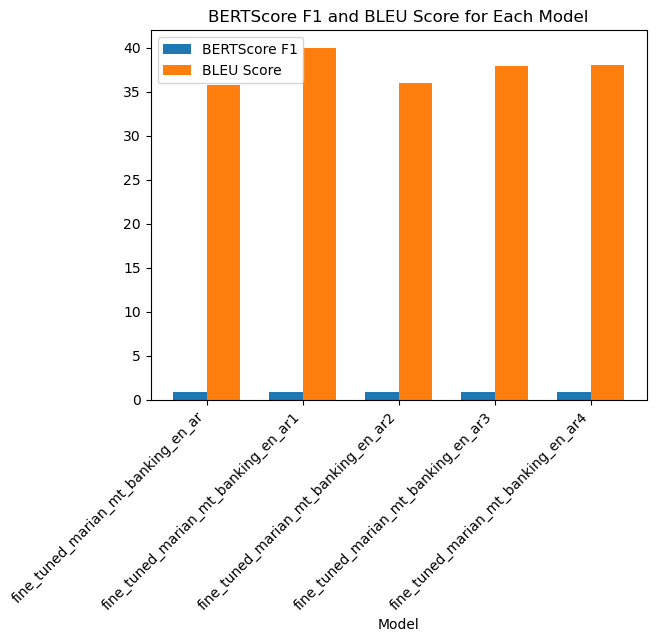

In [ ]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
import torch
import bert_score
import evaluate
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    "fine_tuned_marian_mt_banking_en_ar",
    "fine_tuned_marian_mt_banking_en_ar1",
    "fine_tuned_marian_mt_banking_en_ar2",
    "fine_tuned_marian_mt_banking_en_ar3",
    "fine_tuned_marian_mt_banking_en_ar4"
]

tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-ar")
test_data = pd.read_excel('bankingData_En-Ar_with_splits.xlsx')
test_sentences = test_data[test_data['split'] == 'test']['English'].tolist()
ground_truths = test_data[test_data['split'] == 'test']['Arabic'].tolist()

def translate_texts(model, tokenizer, texts, batch_size=8, max_length=512, num_beams=8):
    translations = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True).to('cuda')
        translated_tokens = model.generate(
            **inputs,
            max_length=max_length,
            num_beams=num_beams,
            length_penalty=1.5,
            top_k=50,
            top_p=0.9
        )
        batch_translations = [tokenizer.decode(t, skip_special_tokens=True) for t in translated_tokens]
        translations.extend(batch_translations)
    return translations

model_scores = {}
bleu_metric = evaluate.load("sacrebleu")

for model_name in model_names:
    model_path = f"./{model_name}"
    model = MarianMTModel.from_pretrained(model_path).to('cuda')
    model_translations = translate_texts(model, tokenizer, test_sentences)
    P, R, F1 = bert_score.score(model_translations, ground_truths, lang="ar", verbose=True)
    avg_f1 = F1.mean().item()
    bleu_score = bleu_metric.compute(predictions=model_translations, references=[[ref] for ref in ground_truths])['score']
    model_scores[model_name] = {
        "bert_score_f1": avg_f1,
        "bleu_score": bleu_score
    }

model_names = list(model_scores.keys())
bert_scores = [model_scores[model]["bert_score_f1"] for model in model_names]
bleu_scores = [model_scores[model]["bleu_score"] for model in model_names]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bert_scores, width, label='BERTScore F1')
rects2 = ax.bar(x + width/2, bleu_scores, width, label='BLEU Score')

ax.set_xlabel('Model')
ax.set_title('BERTScore F1 and BLEU Score for Each Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.legend()

plt.show()


In [ ]:
best_model_bert_score = max(model_scores, key=lambda model: model_scores[model]["bert_score_f1"])
best_model_bleu_score = max(model_scores, key=lambda model: model_scores[model]["bleu_score"])

print(f"Best Model based on BERTScore F1: {best_model_bert_score}")
print(f"BERTScore F1: {model_scores[best_model_bert_score]['bert_score_f1']:.4f}")

Best Model based on BERTScore F1: fine_tuned_marian_mt_banking_en_ar1
BERTScore F1: 0.8873


# so the best model based on the Bert and bleu Score is this model : fine_tuned_marian_mt_banking_en_ar1

# Now i will do human evaluation on the the best model on the Test cases that i have created

now i will test the use models to translated Test cases i have created before to check their

In [2]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------- ----------------------------- 1.0/4.0 MB 5.6 MB/s eta 0:00:01
     ------------------ --------------------- 1.8/4.0 MB 4.4 MB/s eta 0:00:01
     --------------------------------- ------ 3.4/4.0 MB 5.6 MB/s eta 0:00:01
     ---------------------------------------- 4.0/4.0 MB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
print(torch.__version__)           # Displays PyTorch version
print(torch.cuda.is_available())   # Should return True if CUDA is available


2.5.1+cu118
True


In [4]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is properly enabled


True


In [5]:
import torch

# Check if CUDA is available
print("CUDA available:", torch.cuda.is_available())

# Check the name of the GPU being used
if torch.cuda.is_available():
    print("GPU in use:", torch.cuda.get_device_name(0))
else:
    print("No GPU detected.")


CUDA available: True
GPU in use: NVIDIA GeForce RTX 3060


In [9]:
from transformers import MarianMTModel, MarianTokenizer
import pandas as pd

model_name = "fine_tuned_marian_mt_banking_en_ar1"
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-ar")

def translate_texts(model, tokenizer, texts, batch_size=4, max_length=1024, num_beams=5, length_penalty=1.2):
    translations = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=512).to('cuda')
        translated_tokens = model.generate(
            **inputs,
            max_length=max_length,
            num_beams=num_beams,
            early_stopping=False,
            length_penalty=length_penalty,
            no_repeat_ngram_size=3
        )
        batch_translations = [tokenizer.decode(t, skip_special_tokens=True) for t in translated_tokens]
        translations.extend(batch_translations)
    return translations

file_path = 'bankingData_En-Ar_with_splits.xlsx'
data = pd.read_excel(file_path)
test_data = data[data['split'] == 'test'].sample(100, random_state=42)

test_sentences = test_data['English'].tolist()
ground_truth = test_data['Arabic'].tolist()

output_df = pd.DataFrame()
output_df['English'] = test_sentences
output_df['Arabic'] = ground_truth

print(f"Translating with {model_name}...")
model_path = f"./{model_name}"
model = MarianMTModel.from_pretrained(model_path).to('cuda')

output_df['Translated'] = translate_texts(model, tokenizer, test_sentences)
output_df.to_excel("Translated_bankingData_TestSet_Output1411.xlsx", index=False)

print(output_df.head())


Translating with fine_tuned_marian_mt_banking_en_ar1...
                                             English  \
0  I would like to use one of my cards for a fami...   
1      Is there a minimum age for having an account?   
2      What can I do with a disposable virtual card?   
3                  Where can I update my pin number?   
4  I need to deposit my virtual card, how do i do...   

                                              Arabic  \
0  أرغب في استخدام إحدى بطاقاتي لصالح أحد أفراد ع...   
1                        هل هناك عمر أدنى لفتح حساب؟   
2  ماذا يمكنني أن أفعل ببطاقة افتراضية قابلة للاس...   
3             أين يمكنني تحديث الرقم السري الخاص بي؟   
4  أريد إيداع بطاقتي الافتراضية، كيف يمكنني القيا...   

                                          Translated  
0  أرغب في استخدام إحدى بطاقاتي لأحد أفراد عائلتي...  
1                 هل هناك سن أدنى للحصول على حساب ما  
2  ماذا يمكنني أن أفعل بالبطاقة الافتراضية قابلة ...  
3              أين يمكنني تحديث رقم التعريف استخدا

# Human Evaluation
To assess the quality of translations produced by the fine-tuned
MarianMT model for the banking domain, I selected 100 sentences for human evaluation. Each translation will be rated on a scale from 1 to 3, with half-point increments (1, 1.5, 2, 2.5, and 3) based on the following overall quality criterion:

Overall Quality Criterion
3: The translation is highly accurate and fluent, conveying the full meaning of the original text with clarity and correct banking terminology. It reads naturally and resembles a human translation, with no errors affecting readability or understanding.

2.5: The translation is mostly accurate and fluent, with minor phrasing issues or slight inconsistencies in terminology. It conveys the original meaning well but may lack perfect naturalness or precise domain-specific wording.

2: The translation is generally acceptable, delivering the main message with some minor errors in meaning, terminology, or phrasing that do not significantly impact comprehension. It may read as slightly awkward or contain minor inaccuracies.

1.5: The translation has noticeable issues in accuracy, fluency, or terminology, causing slight confusion or requiring effort to understand. Domain-specific terms may be inconsistent, and the phrasing may appear awkward.

1: The translation has significant issues in meaning, fluency, or terminology, making it difficult to understand or unsuitable for the banking domain. The errors disrupt the overall comprehension and misrepresent the original message.

This criterion allows a comprehensive assessment of each translation’s quality, combining accuracy, fluency, and domain appropriateness in a single score.

# Now i did human evaluation on 100 samples and here is the visualization of the evaluation :

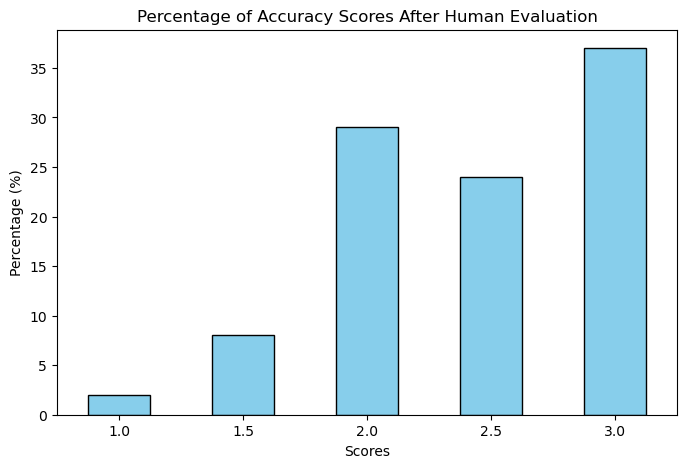

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the evaluation file
file_path = 'Translated_bankingData_TestSet_Output1411.xlsx'
df = pd.read_excel(file_path)

# Extract the scores for evaluation
scores = df['Score (1 ,1.5 ,2 ,2.5 ,3)']

# Calculate the percentage distribution of each score
score_distribution = scores.value_counts(normalize=True) * 100

# Plot the score distribution as a bar chart
plt.figure(figsize=(8, 5))
score_distribution.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Accuracy Scores After Human Evaluation')
plt.xlabel('Scores')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.show()


In [13]:
average_score = scores.mean()
overall_accuracy_percentage = (average_score / 3) * 100  # Scale to percentage (3 being the highest possible score)

f"Overall Accuracy (Human Evaluation): {overall_accuracy_percentage:.2f}%"


'Overall Accuracy (Human Evaluation): 81.00%'

# So the 'Overall Accuracy (Human Evaluation): 81.00%'

# Saving the best model

In [ ]:
import zipfile

# Define the path for the file to be zipped and the zip file name
file_to_zip = "Consolidated_Translations.xlsx"
zip_file_name = "fine_tuned_marian_mt_banking_en_ar1.zip"

# Create a zip file
with zipfile.ZipFile(f"{zip_file_name}", 'w') as zipf:
    zipf.write(file_to_zip, arcname="Consolidated_Translations.xlsx")

zip_file_name


'fine_tuned_marian_mt_banking_en_ar1.zip'

# Arabic Text-to-Speech Conversion for Translated Sentences

Explanation: the next step of translation is to load the translated sentences to the tts model so here
I used the facebook/mms-tts-ara model from Hugging Face to convert Arabic text to speech. Here’s a summary of the process:

Loaded the model and tokenizer.
Input the Arabic text ("مرحباً، كيف يمكنني مساعدتك اليوم؟") and tokenized it.
Generated the waveform output using the model in a PyTorch tensor.
Converted the tensor to a NumPy array and saved it as a .wav file.
Played the audio output, achieving a clear, natural-sounding Arabic voice for the specified text.
This approach leverages Hugging Face’s MMS-TTS project for efficient Arabic TTS conversion in the banking domain.

In [26]:
pip install --upgrade transformers accelerate scipy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
    --------------------------------------- 0.8/44.5 MB 4.2 MB/s eta 0:00:11
   -- ------------------------------------- 2.4/44.5 MB 6.1 MB/s eta 0:00:07
   --- ------------------------------------ 3.7/44.5 MB 6.1 MB/s eta 0:00:07
   ---- ----------------------------------- 5.0/44.5 MB 6.3 MB/s eta 0:00:07
   ----- ---------------------------------- 6.6/44.5 MB 6.6 MB/s eta 0:00:06
   ------- -------------------------------- 8.1/44.5 MB 6.9 MB/s eta 0:00:06
   -------- ------------------------------- 10.0/44.5 MB 7.1 MB/s eta 0:00:05
   ---------- ----------------------------- 11.5/44.5 MB 7.2 MB/s eta 0:00:05
   ------------ --------------------------- 13.4/44.5 MB 7.4 MB/s eta 0:00:05
   ------------- -------------------------- 14.9/44.5 MB 7.5 MB/s eta 0:00:04
   ----------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [31]:
from transformers import VitsModel, AutoTokenizer
import torch
import scipy
import numpy as np
from IPython.display import Audio

# Load the model and tokenizer
model = VitsModel.from_pretrained("facebook/mms-tts-ara")
tokenizer = AutoTokenizer.from_pretrained("facebook/mms-tts-ara")

# Arabic text to synthesize
text = "مرحباً، كيف يمكنني مساعدتك اليوم؟"

# Tokenize and convert text to speech
inputs = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    output = model(**inputs).waveform

# Convert the PyTorch tensor to a NumPy array and remove extra dimensions
output_np = output.squeeze().cpu().numpy()

# Save the output as a .wav file
scipy.io.wavfile.write("arabic_tts_output.wav", rate=model.config.sampling_rate, data=output_np)

# Play the audio in a Jupyter Notebook or Google Colab
Audio(output_np, rate=model.config.sampling_rate)
